# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001529C240438>]], dtype=object)

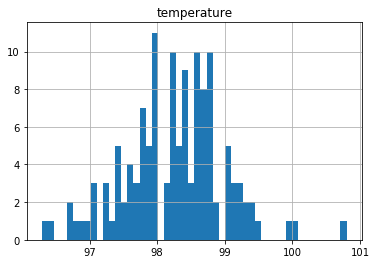

In [89]:
import matplotlib as mp
import numpy as np
import scipy.stats as st
import pandas as pd
%matplotlib inline

#Q1- Is the distribution of body temperatures normal?
df = pd.read_csv('data/human_body_temperature.csv') #read data
temps = pd.DataFrame(df['temperature']).sort_values(by='temperature') #isolate variable
temps.hist(bins=50) #plot  to see data

In [17]:
temps_array = np.array(temps) #change data to array
st.normaltest(temps) #use skipy to see if normal

NormaltestResult(statistic=array([ 2.70380143]), pvalue=array([ 0.25874799]))

A1: the distrbution above looks scewed left and according to the documentation a low p-value for the skipy test would show a normal distrbution. Since the distrbution looks scewed and the pvalue is high (.25) we can conclude that this is not a normal distrbution

In [50]:
#Q2 Is the sample size large? Are the observations independent?
sample_size = len(temps_array) #compute no. of observations
sample_size

130

A2: with 130 obs. the sample size is large. The observations are indpendednt of one another as they are isolated to an individual.

In [90]:
#Q3(a):Is the true population mean really 98.6 degrees F?
temps_mean = temps_array.mean() #calculate sample mean
temps_mean

98.249230769230778

A3(a): the sample mean suggests that the population mean is not 98.6 

In [91]:
#Q3(b)In this situation, is it appropriate to use the  tt  or  zz  statistic?

import math
pop_mean = float(98.6)
zvalue = (temps_mean - pop_mean) / (temps_array.std()/math.sqrt(sample_size)) #compute z value
zvalue

-5.4759252020781153

A3(b) the z value is the correct statistic because the sample size is > 30

In [52]:
#Q3(c) Now try using the other test. How is the result be different? Why?
tvalue = (temps_mean - pop_mean) / (temps_array.std()/math.sqrt(130)) #compute t value
tvalue

-5.4759252020781153

A3(c) the value is the same because both the t an z score are calculated the same way. The one you use is based off of sample size.

In [68]:
#Q4 At what temperature should we consider someone's temperature to be "abnormal"?
con_int = np.array([(temps_mean-temps_mean*(2*(temps_array.std()/math.sqrt(sample_size)))),
                     (temps_mean+temps_mean*(2*(temps_array.std()/math.sqrt(sample_size))))])#compute confidence interval and store in array
con_int

array([  85.66220453,  110.83625701])

A4 the above array shows the bounds where we are 95% confident that the true mean is. Anything outside would be considered abnormal.

In [88]:
#Q5 Is there a significant difference between males and females in normal temperature?
temps_male = df.gender == 'M'
temps_female = df.gender == 'F'
temps_male_df = df[temps_male]['temperature']
temps_female_df = df[temps_female]['temperature']
st.stats.ttest_ind(temps_male_df,temps_female_df)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

A5 I used a 2 sample test in order to test if theres a difference between the sample males and sample females. With a z score of 2.28 and a pvalue of .02 we can reject the null hypothesis that there is no difference between male and female temperature.